# Basic settings

In [1]:
import tqdm 
import numpy as np
from matplotlib import pyplot as plt

# define starting abilities
N_people = 1000
N_luck = 250
N_unluck = 250
resolution = 0.01

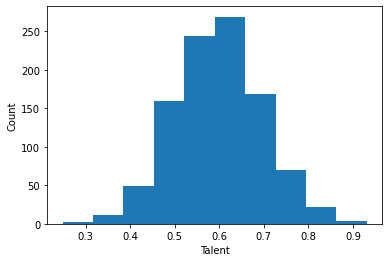

In [2]:
talents = np.random.normal(0.6, 0.1, N_people)
talents[talents>0.99] = 0.99
talents[talents<0.01] = 0.01
plt.hist(talents)
plt.xlabel('Talent')
plt.ylabel('Count')
plt.show()

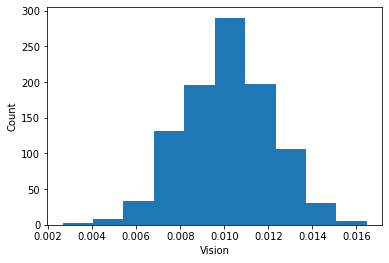

In [3]:
# define vision
visions = np.random.normal(resolution, resolution/5, N_people)
visions[visions<resolution/10] = resolution/10
visions[visions>resolution*2] = resolution*2

plt.hist(visions)
plt.xlabel('Vision')
plt.ylabel('Count')
plt.show()

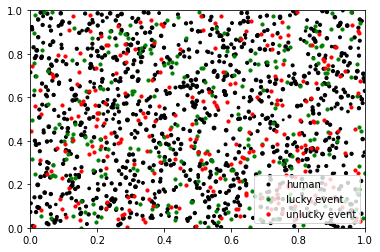

In [4]:
positions = np.random.random((N_people, 2))
properties = np.ones(N_people) * 10

lucks = np.random.random((N_luck, 2))
unlucks = np.random.random((N_unluck, 2))
plt.scatter(positions[:, 0],positions[:, 1], s=visions*1000, c = 'black', label = 'human')
plt.scatter(lucks[:, 0],lucks[:, 1], s=10, c = 'green', label = 'lucky event')
plt.scatter(unlucks[:, 0],unlucks[:, 1], s=10, c = 'red', label = 'unlucky event')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc=4)
plt.show()

# Experiments

In [5]:
def meet_events(x, events, vision=resolution):
    for event in events:
        if np.square(x[0]-event[0]) + np.square(x[1]-event[1]) < np.square(vision):
            return True
    return False

def run_simulation(n_iteration, see_talent=False, see_vision=False):
    simulated_properties = properties.copy()
    for iteration in tqdm.tqdm(range(n_iteration), total = n_iteration):
        meetluck_p = np.random.random(N_people)
        lucks, unlucks = np.random.random((N_luck, 2)), np.random.random((N_unluck, 2))
        for i, (p, v) in enumerate(zip(positions, visions)):
            if meet_events(p, unlucks):
                simulated_properties[i] /= 2
            elif see_vision and meet_events(p, lucks, visions[i]):
                if see_talent and meetluck_p[i] < talents[i]:
                    simulated_properties[i] *= 2
                else:
                    simulated_properties[i] *= 2
            elif meet_events(p, lucks):
                if see_talent and meetluck_p[i] < talents[i]:
                    simulated_properties[i] *= 2
                else:
                    simulated_properties[i] *= 2
    return simulated_properties

100%|███████████████████████████████████████████| 80/80 [02:31<00:00,  1.90s/it]


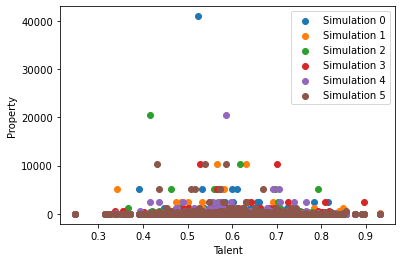

In [6]:
# Scenario 1: Same vision, different talent
for n in range(6):
    simulated_properties = run_simulation(80, see_talent=True)
    plt.scatter(talents, simulated_properties, label = 'Simulation %d' % n)
plt.xlabel('Talent')
plt.ylabel('Property')
plt.legend()
plt.show()

100%|███████████████████████████████████████████| 80/80 [03:48<00:00,  2.85s/it]


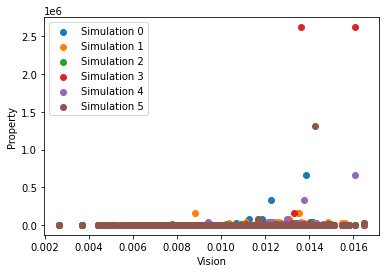

In [7]:
# Scenario 2: Same talent, different vision
for n in range(6):
    simulated_properties = run_simulation(80, see_vision=True)
    plt.scatter(visions, simulated_properties, label = 'Simulation %d' % n)
plt.xlabel('Vision')
plt.ylabel('Property')
plt.legend()
plt.show()

100%|███████████████████████████████████████████| 80/80 [03:54<00:00,  2.93s/it]


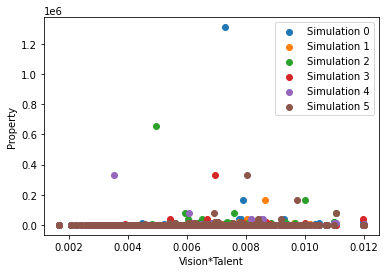

In [8]:
# Scenario 3: different talent, different vision
for n in range(6):
    simulated_properties = run_simulation(80, see_talent=True, see_vision=True)
    plt.scatter(visions*talents, simulated_properties, label = 'Simulation %d' % n)
    
plt.xlabel('Vision*Talent')
plt.ylabel('Property')
plt.legend()
plt.show()